In [1]:
import geopandas as gpd

# Load data set

taxi_zones_gpd = gpd.read_file("../../data/raw/taxi_zones")
taxi_zones_gpd.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

<Axes: >

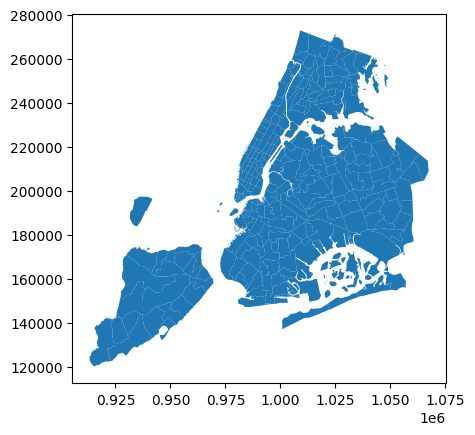

In [2]:
taxi_zones_gpd.plot()

In [3]:
# Check the coordinate reference system (CRS) of taxi_zones_gpd
print(taxi_zones_gpd.crs)

EPSG:2263


In [4]:
# Convert the CRS to WGS84 (EPSG:4326) if it's not already in that CRS
taxi_zones_wgs84 = taxi_zones_gpd.to_crs(epsg=4326)
taxi_zones_wgs84.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((-74.18445 40.695, -74.18449 40.6951,...  
1         Queens  MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...  
2          Bronx  POLYGON ((-73.84793 40.87134, -73.84725 40.870...  
3      Manhattan  POLYGON ((-73.97177 40.72582, -73.97179 40.725...  
4  Staten Island  POLYGON ((-74.17422 40.56257, -74.17349 40.562...

## Analysing Busiest Pickup Zones of Uber ! 

In [5]:
import pandas as pd

uber_transactions_df = pd.read_csv('../../data/raw/uber-raw-data-sep14.csv')
uber_transactions_df.head()

Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512

In [6]:
# Construct a GeoDataFrame from the Uber transactions DataFrame
from shapely.geometry import Point
# Create a geometry data from the pickup longitude and latitude  
geometry = [Point(xy) for xy in zip(uber_transactions_df['Lon'] , uber_transactions_df["Lat"])]

In [7]:
geometry[0:5]

[<POINT (-74.002 40.22)>,
 <POINT (-74.003 40.75)>,
 <POINT (-73.986 40.756)>,
 <POINT (-73.989 40.745)>,
 <POINT (-73.944 40.814)>]

In [8]:
# Create a GeoDataFrame from the Uber transactions DataFrame
uber_transactions_gpd = gpd.GeoDataFrame(uber_transactions_df, geometry=geometry, crs='EPSG:4326')
uber_transactions_gpd.head()

Date/Time      Lat      Lon    Base                  geometry
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512  POINT (-74.0021 40.2201)
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512    POINT (-74.0027 40.75)
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512  POINT (-73.9864 40.7559)
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512   POINT (-73.9889 40.745)
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512  POINT (-73.9444 40.8145)

In [9]:
# Check taxi zones columns
taxi_zones_wgs84.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='str')

In [10]:
# Spatial join to find out which taxi zone each Uber transaction belongs to
uber_transactions_with_zones = gpd.sjoin(uber_transactions_gpd,
                                          taxi_zones_wgs84[['zone', 'LocationID', 'borough','geometry']],
                                            how='left',
                                              predicate='within')
uber_transactions_with_zones.head()

Date/Time      Lat      Lon    Base                  geometry  \
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512  POINT (-74.0021 40.2201)   
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512    POINT (-74.0027 40.75)   
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512  POINT (-73.9864 40.7559)   
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512   POINT (-73.9889 40.745)   
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512  POINT (-73.9444 40.8145)   

   index_right                       zone  LocationID    borough  
0          NaN                        NaN         NaN        NaN  
1        245.0  West Chelsea/Hudson Yards       246.0  Manhattan  
2        229.0  Times Sq/Theatre District       230.0  Manhattan  
3        233.0                   Union Sq       234.0  Manhattan  
4         41.0       Central Harlem North        42.0  Manhattan

In [11]:
uber_transactions_with_zones['zone'].value_counts().head(15)

zone
Midtown Center                   32948
Union Sq                         31855
TriBeCa/Civic Center             31114
East Village                     29009
East Chelsea                     24533
West Village                     24240
JFK Airport                      23567
Upper East Side South            21633
Midtown North                    21590
Murray Hill                      21525
Midtown East                     21276
Times Sq/Theatre District        21224
West Chelsea/Hudson Yards        21149
Meatpacking/West Village West    21091
Midtown South                    20934
Name: count, dtype: int64

In [12]:
uber_transactions_with_zones['zone'].value_counts().index

Index(['Midtown Center', 'Union Sq', 'TriBeCa/Civic Center', 'East Village',
       'East Chelsea', 'West Village', 'JFK Airport', 'Upper East Side South',
       'Midtown North', 'Murray Hill',
       ...
       'Breezy Point/Fort Tilden/Riis Beach', 'Crotona Park', 'Port Richmond',
       'Oakwood', 'Eltingville/Annadale/Prince's Bay',
       'New Dorp/Midland Beach', 'Broad Channel', 'Arden Heights',
       'Great Kills', 'Rossville/Woodrow'],
      dtype='str', name='zone', length=254)

## Finding Top pick up zone

In [13]:
top_zones = uber_transactions_with_zones['zone'].value_counts()[:15]
top_zones

zone
Midtown Center                   32948
Union Sq                         31855
TriBeCa/Civic Center             31114
East Village                     29009
East Chelsea                     24533
West Village                     24240
JFK Airport                      23567
Upper East Side South            21633
Midtown North                    21590
Murray Hill                      21525
Midtown East                     21276
Times Sq/Theatre District        21224
West Chelsea/Hudson Yards        21149
Meatpacking/West Village West    21091
Midtown South                    20934
Name: count, dtype: int64

In [14]:
# Construct summary table for top 15 zones to dataframe
top_zones_df = top_zones.reset_index()
top_zones_df.columns = ['zone', 'count']
top_zones_df.head()

zone  count
0        Midtown Center  32948
1              Union Sq  31855
2  TriBeCa/Civic Center  31114
3          East Village  29009
4          East Chelsea  24533

In [15]:
top_zones_gpd = taxi_zones_wgs84.merge(top_zones_df, left_on='zone', right_on='zone', how='inner')
top_zones_gpd.head()

OBJECTID  Shape_Leng  Shape_Area                           zone  \
0        68    0.049337    0.000111                   East Chelsea   
1        79    0.042625    0.000108                   East Village   
2       132    0.245479    0.002038                    JFK Airport   
3       158    0.054810    0.000186  Meatpacking/West Village West   
4       161    0.035804    0.000072                 Midtown Center   

   LocationID    borough                                           geometry  \
0          68  Manhattan  POLYGON ((-74.00202 40.74044, -74.00252 40.739...   
1          79  Manhattan  POLYGON ((-73.98378 40.72154, -73.98382 40.721...   
2         132     Queens  MULTIPOLYGON (((-73.82503 40.66358, -73.82486 ...   
3         158  Manhattan  POLYGON ((-74.00779 40.74197, -74.00697 40.741...   
4         161  Manhattan  POLYGON ((-73.97534 40.7553, -73.97581 40.7546...   

   count  
0  24533  
1  29009  
2  23567  
3  21091  
4  32948

In [16]:
top_zones_gpd_2263 = top_zones_gpd.to_crs(epsg=2263)

In [17]:
top_zones_gpd_2263

OBJECTID  Shape_Leng  Shape_Area                           zone  \
0         68    0.049337    0.000111                   East Chelsea   
1         79    0.042625    0.000108                   East Village   
2        132    0.245479    0.002038                    JFK Airport   
3        158    0.054810    0.000186  Meatpacking/West Village West   
4        161    0.035804    0.000072                 Midtown Center   
5        162    0.035270    0.000048                   Midtown East   
6        163    0.034177    0.000041                  Midtown North   
7        164    0.035772    0.000056                  Midtown South   
8        170    0.045769    0.000074                    Murray Hill   
9        230    0.031028    0.000056      Times Sq/Theatre District   
10       231    0.063420    0.000167           TriBeCa/Civic Center   
11       234    0.036072    0.000073                       Union Sq   
12       237    0.042213    0.000096          Upper East Side South   
13       246    0.069467    0.000281      West Chelsea/Hudson Yards   
14       249    0.036384    0.000072                   West Village   

    LocationID    borough                                           geometry  \
0           68  Manhattan  POLYGON ((983690.405 209040.369, 983550.612 20...   
1           79  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   
2          132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
3          158  Manhattan  POLYGON ((982091.02 209596.704, 982318.344 209...   
4          161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
5          162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
6          163  Manhattan  POLYGON ((989412.663 219020.943, 990045.841 21...   
7          164  Manhattan  POLYGON ((988787.425 210315.593, 988662.868 21...   
8          170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   
9          230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
10         231  Manhattan  POLYGON ((981667.364 203305, 981854.109 203130...   
11         234  Manhattan  POLYGON ((987029.847 207022.299, 987048.27 206...   
12         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
13         246  Manhattan  POLYGON ((983031.177 217138.506, 983640.32 216...   
14         249  Manhattan  POLYGON ((983555.319 204876.901, 983469.158 20...   

    count  
0   24533  
1   29009  
2   23567  
3   21091  
4   32948  
5   21276  
6   21590  
7   20934  
8   21525  
9   21224  
10  31114  
11  31855  
12  21633  
13  21149  
14  24240

In [18]:
top_zones_gpd_2263['centroid'] = top_zones_gpd_2263['geometry'].centroid
top_zones_gpd_2263.head()

OBJECTID  Shape_Leng  Shape_Area                           zone  \
0        68    0.049337    0.000111                   East Chelsea   
1        79    0.042625    0.000108                   East Village   
2       132    0.245479    0.002038                    JFK Airport   
3       158    0.054810    0.000186  Meatpacking/West Village West   
4       161    0.035804    0.000072                 Midtown Center   

   LocationID    borough                                           geometry  \
0          68  Manhattan  POLYGON ((983690.405 209040.369, 983550.612 20...   
1          79  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   
2         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
3         158  Manhattan  POLYGON ((982091.02 209596.704, 982318.344 209...   
4         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   

   count                        centroid  
0  24533   POINT (984272.779 211948.912)  
1  29009   POINT (988147.658 204368.502)  
2  23567  POINT (1043488.187 175062.678)  
3  21091   POINT (981760.163 207069.855)  
4  32948   POINT (990428.526 215447.527)

In [19]:
# convert to WGS84 coordinate system for visualization
temp_gpd = top_zones_gpd_2263.copy()
temp_gpd['geometry'] = temp_gpd['geometry'].to_crs(epsg=4326)
temp_gpd['centroid'] = temp_gpd['centroid'].to_crs(epsg=4326)
top_zones_gpd_4326 = temp_gpd
top_zones_gpd_4326.head()

OBJECTID  Shape_Leng  Shape_Area                           zone  \
0        68    0.049337    0.000111                   East Chelsea   
1        79    0.042625    0.000108                   East Village   
2       132    0.245479    0.002038                    JFK Airport   
3       158    0.054810    0.000186  Meatpacking/West Village West   
4       161    0.035804    0.000072                 Midtown Center   

   LocationID    borough                                           geometry  \
0          68  Manhattan  POLYGON ((-74.00202 40.74044, -74.00252 40.739...   
1          79  Manhattan  POLYGON ((-73.98378 40.72154, -73.98382 40.721...   
2         132     Queens  MULTIPOLYGON (((-73.82503 40.66358, -73.82486 ...   
3         158  Manhattan  POLYGON ((-74.00779 40.74197, -74.00697 40.741...   
4         161  Manhattan  POLYGON ((-73.97534 40.7553, -73.97581 40.7546...   

   count                    centroid  
0  24533  POINT (-73.99992 40.74843)  
1  29009  POINT (-73.98594 40.72762)  
2  23567  POINT (-73.78653 40.64699)  
3  21091  POINT (-74.00898 40.73504)  
4  32948   POINT (-73.9777 40.75803)

In [20]:
# Geospatial visualization using Folium
import folium

base_map = folium.Map(location = [40.75 , -73.97] , zoom_start= 12, tiles = 'cartodbpositron')

In [21]:
for index , row in top_zones_gpd_4326.iterrows():
    folium.CircleMarker(
    location = [row["centroid"].y , row["centroid"].x] , 
        radius = row["count"]/2000 , 
        color = "crimson" , 
        fill = True , 
        fill_opacity = 0.6 , 
        tooltip = f"{row['zone']} : {int(row['count'])} pickups"
    ).add_to(base_map)

In [22]:
from IPython.display import display
display(base_map)

## Create Marker cluster for analysis

In [23]:
uber_transactions_df.head()

Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512

In [24]:
# Create bins for Lat_bins and Lon_bins
uber_transactions_df['Lat_bins'] = uber_transactions_df['Lat'].round(3) 
uber_transactions_df['Lon_bins'] = uber_transactions_df['Lon'].round(3) 

In [25]:
rush_uber_bin = uber_transactions_df.groupby(['Lat_bins', 'Lon_bins'], as_index=False).size()
rush_uber_bin.sort_values(by = "size" , ascending= False)

Lat_bins  Lon_bins  size
4582     40.645   -73.782  7440
24312    40.774   -73.872  6038
4691     40.646   -73.777  4005
24311    40.774   -73.873  2684
18304    40.740   -74.006  2638
...         ...       ...   ...
16390    40.729   -73.911     1
16392    40.729   -73.903     1
16402    40.729   -73.879     1
16403    40.729   -73.878     1
34645    41.348   -73.671     1

[34646 rows x 3 columns]

In [26]:
import folium
from folium.plugins import FastMarkerCluster

base_map_cluster = folium.Map(location=[40.75, -73.97], zoom_start=12, tiles='cartodbpositron')
FastMarkerCluster(rush_uber_bin[['Lat_bins', 'Lon_bins', 'size']]).add_to(base_map_cluster)
display(base_map_cluster)

## Uber Demand Over time 

In [27]:
# Create data_time column from the date/time column
uber_transactions_df['data_time'] = pd.to_datetime(uber_transactions_df['Date/Time'])

In [28]:
uber_transactions_df['hour'] = uber_transactions_df['data_time'].dt.hour

In [29]:
# Check results
uber_transactions_df.head()

Date/Time      Lat      Lon    Base  Lat_bins  Lon_bins  \
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512    40.220   -74.002   
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512    40.750   -74.003   
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512    40.756   -73.986   
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512    40.745   -73.989   
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512    40.814   -73.944   

            data_time  hour  
0 2014-09-01 00:01:00     0  
1 2014-09-01 00:01:00     0  
2 2014-09-01 00:03:00     0  
3 2014-09-01 00:06:00     0  
4 2014-09-01 00:11:00     0

In [30]:
heatmap_data = []

for h in range(24):
    hour_df = uber_transactions_df[uber_transactions_df["hour"] == h]
    grouped = hour_df.groupby(['Lat_bins' , 'Lon_bins']).size().reset_index(name = "count")
    heatmap_data.append(grouped[['Lat_bins' , 'Lon_bins' , 'count']].values.tolist())

In [31]:
heatmap_data

[[[40.189, -74.027, 1.0],
  [40.22, -74.002, 1.0],
  [40.349, -74.069, 1.0],
  [40.352, -74.651, 1.0],
  [40.352, -74.066, 1.0],
  [40.355, -74.074, 1.0],
  [40.374, -74.0, 1.0],
  [40.393, -74.11, 1.0],
  [40.394, -74.357, 2.0],
  [40.402, -73.984, 1.0],
  [40.423, -74.193, 1.0],
  [40.462, -74.296, 1.0],
  [40.48, -74.41, 2.0],
  [40.496, -74.446, 1.0],
  [40.499, -74.453, 1.0],
  [40.499, -74.448, 1.0],
  [40.5, -74.454, 1.0],
  [40.503, -74.454, 1.0],
  [40.531, -74.534, 1.0],
  [40.575, -73.98, 1.0],
  [40.576, -73.98, 2.0],
  [40.576, -73.961, 2.0],
  [40.577, -73.982, 1.0],
  [40.577, -73.965, 1.0],
  [40.577, -73.953, 1.0],
  [40.578, -73.972, 1.0],
  [40.578, -73.962, 2.0],
  [40.578, -73.954, 1.0],
  [40.579, -73.998, 1.0],
  [40.58, -73.972, 1.0],
  [40.58, -73.969, 1.0],
  [40.58, -73.968, 1.0],
  [40.581, -73.971, 2.0],
  [40.584, -73.947, 2.0],
  [40.584, -73.945, 1.0],
  [40.584, -73.659, 1.0],
  [40.585, -73.966, 1.0],
  [40.586, -74.092, 1.0],
  [40.587, -73.984, 1.0],

In [32]:
import folium
from folium.plugins import HeatMapWithTime
base_map_demand = folium.Map(location = [40.75 , -73.97] , zoom_start = 11, tiles = 'cartodbpositron')

HeatMapWithTime(heatmap_data , 
                index = [f"{h}:00" for h in range(24)] , 
                auto_play = True , 
                max_opacity = 0.7
           ).add_to(base_map_demand)

In [33]:
base_map_demand

In [ ]:
# Save the map to an HTML file
base_map_demand.save("../../results/uber_demand_heatmap.html")